In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "734917bff96408e5e7a23e9a2058afe1"
query_url = f"{url}appid={api_key}&units=metric&q="

city_list = []
countries = []
dates = []
lats = []
lngs = []
clouds = []
hums = []
mxtemps = []
winds = []

counter = 1

for city in cities:

   response = requests.get(query_url + city).json()
   try:
       city_list.append(response['name'])
       countries.append(response['sys']['country'])
       dates.append(response['dt'])
       lats.append(response['coord']['lat'])
       lngs.append(response['coord']['lon'])
       clouds.append(response['clouds']['all'])
       hums.append(response['main']['humidity'])
       mxtemps.append(response['main']['temp_max'])
       winds.append(response['wind']['speed'])

       print(f"Processing Record #: {counter} | city: {city}")
       counter += 1
   except:
       print("City not found. Skipping city.")
       continue    

Processing Record #: 1 | city: itarema
Processing Record #: 2 | city: pakxan
Processing Record #: 3 | city: yellowknife
Processing Record #: 4 | city: airai
Processing Record #: 5 | city: ponta do sol
Processing Record #: 6 | city: los llanos de aridane
Processing Record #: 7 | city: mataura
Processing Record #: 8 | city: mazabuka
Processing Record #: 9 | city: cidreira
Processing Record #: 10 | city: ullapool
Processing Record #: 11 | city: tasiilaq
Processing Record #: 12 | city: mangrol
City not found. Skipping city.
Processing Record #: 13 | city: clarence town
Processing Record #: 14 | city: atuona
Processing Record #: 15 | city: nabire
Processing Record #: 16 | city: bambous virieux
Processing Record #: 17 | city: erzin
Processing Record #: 18 | city: busselton
Processing Record #: 19 | city: new norfolk
Processing Record #: 20 | city: qaqortoq
Processing Record #: 21 | city: acapulco
Processing Record #: 22 | city: esperance
Processing Record #: 23 | city: san quintin
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_dict = {'City':city_list, 'Country':countries, 'Date':dates, 'Lat':lats, 'Lng': lngs, 'Cloudiness':clouds, 'Humidity':hums, 'Max Temp':mxtemps, 'Wind Speed':winds}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Itarema,BR,1554844422,-2.92,-39.92,68,91,26.20,3.06
1,Pakxan,LA,1554844422,18.39,103.66,0,93,22.00,0.26
2,Yellowknife,CA,1554844340,62.45,-114.38,20,74,7.22,3.10
3,Airai,TL,1554844423,-8.93,125.41,0,85,20.50,0.76
4,Ponta do Sol,BR,1554844423,-20.63,-46.00,44,74,23.40,1.66


In [37]:
export_csv = weather_data.to_csv (r'C:\Users\prash\Documents\GTATL201902DATA3\06-Python-APIs\Homework\weather_dataframe.csv', index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

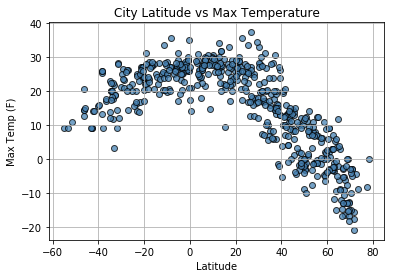

In [58]:
x_axis = weather_data['Lat']
y_axis = weather_data['Max Temp']
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.savefig("Temperature_vs_Latitude.png")

#### Latitude vs. Humidity Plot

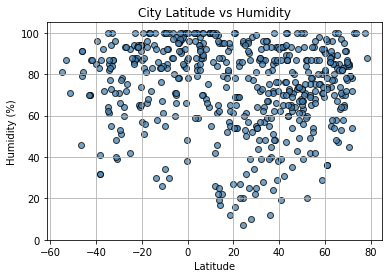

In [59]:
x_axis2 = weather_data['Lat']
y_axis2 = weather_data['Humidity']
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 105)
plt.scatter(x_axis2, y_axis2, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.savefig("Temperature_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

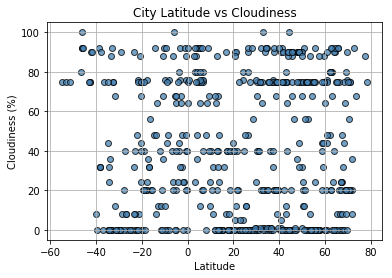

In [60]:
x_axis3 = weather_data['Lat']
y_axis3 = weather_data['Cloudiness']
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(x_axis3, y_axis3, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.savefig("Temperature_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

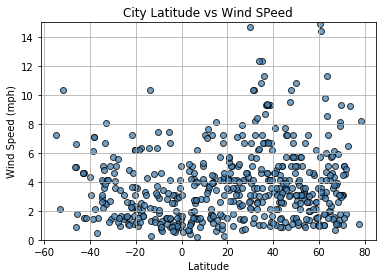

In [61]:
x_axis4 = weather_data['Lat']
y_axis4 = weather_data['Wind Speed']
plt.title("City Latitude vs Wind SPeed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 15)
plt.scatter(x_axis4, y_axis4, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.savefig("Temperature_vs_Wind_Speed.png")

In [ ]:
# WeatherPy
----

### Analysis
#* The closer a city is to the equator, the higher the max temperature recorded. There are more records for cities above the equator, showing colder temptures the further north one goes. 
#This makes sense, as there is more landmass above the equator than there is below, and thus more cities. This excludes Antarctica, given there are no cities on that continent.
#* There seems to be no correlation between cloudiness and latitude. However, most cities seem to cluster at individual levels of cloudiness (0%, 20%, 40%, ~75%, and ~90-95%). This may 
#be due to reports of cloudiness being lumped into 20% or 40% for example as an expedient, when the actual cloudiness might be more granular.
#* When looking at wind speed, there seems to be no major correlation between windspeed and latitude. There does, however, seem to be a higher concentration cities with high wind speeds
#at latitudes far north of the Equator.